
# Portfolio 2: Analysing COVID-19 Data

This is an analysis of the global spread of COVID-19. The data used is being made available by Johns Hopkins University in [GitHub repository](https://github.com/CSSEGISandData/COVID-19). We will look at trends by country. 


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
%matplotlib inline

In [3]:
# load the live dataset, assumes a working network connection
covid_data_url = 'data/covid19-2020-04-22.csv'
covid = pd.read_csv(covid_data_url)

In [88]:
covid.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,607,665,714,784,840,906,933,996,1026,1092
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,446,467,475,494,518,539,548,562,584,609
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,638,646,659,673,673,696,704,713,717,717
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,19,19,19,19,19,24,24,24,24


## Explore the Data

The format of this data is one row per geographical region with columns for Lat/Long and then one column for each day's data.  Most regions are countries but in some cases, as in Australia, they are states.  

For the analysis we want to do we'll look at data for countries only, so the first operation on the data frame is to combine all of the rows for countries like Australia that are split into states.  We then want to drop the non-numeric columns to leave us with just the numbers on each day for each country. 

In [89]:
grouped = covid.groupby('Country/Region').sum()
grouped = grouped.drop(columns=['Lat', 'Long'])
grouped.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,607,665,714,784,840,906,933,996,1026,1092
Albania,0,0,0,0,0,0,0,0,0,0,...,446,467,475,494,518,539,548,562,584,609
Algeria,0,0,0,0,0,0,0,0,0,0,...,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811
Andorra,0,0,0,0,0,0,0,0,0,0,...,638,646,659,673,673,696,704,713,717,717
Angola,0,0,0,0,0,0,0,0,0,0,...,19,19,19,19,19,19,24,24,24,24


You can now select just the data for one country [using the `loc` method](https://pandas.pydata.org/docs/getting_started/10min.html#selection) since the new dataframe will have the grouped values (Countries) as the row labels. Select the data for one country (you choose which) and plot it.  You should see the exponential rise in case numbers over time.

### Australia

Looking at the single case of Australia, we see that there is a steady rise of confirmed cases from the 12th March until 21st April, where it begins to taper off. 

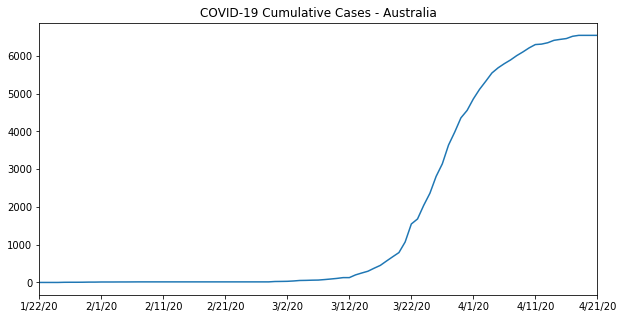

In [90]:
ax = grouped.loc['Australia']
ax.plot(figsize=(10, 5), title="COVID-19 Cumulative Cases - Australia", label="test")

## Comparing Countries

When omparing confirmed cases in Australia against China, USA, Italy and the UK, we see that Australia has fared quite well in comparison. 

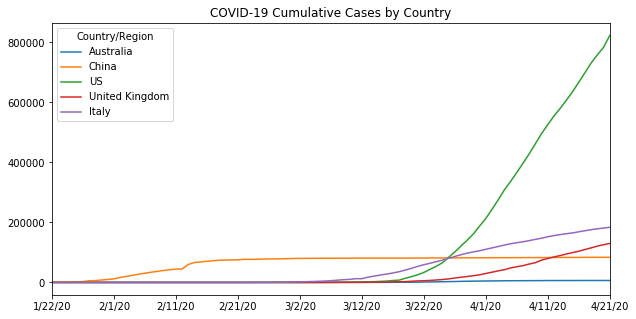

In [91]:
#grouped.index.values
df = grouped.loc[['Australia', 'China', 'US', 'United Kingdom', 'Italy']]
df.head()
df.transpose().plot(figsize=(10, 5), title="COVID-19 Cumulative Cases by Country")
plt.show()

It is believed outbreak of Covid-19 originated in China in late 2019, and then spread to other countries in early 2020 at various times. To make a direct side-by-side comparision of transmission growth, the below chart compares confirmed cases starting at the point where each country had 100 confirmed cases...

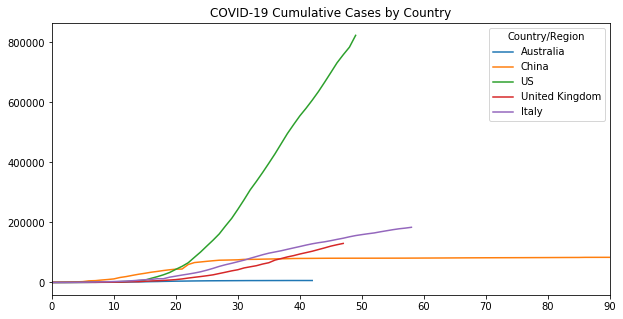

Country/Region,Australia,China,US,United Kingdom,Italy
0,107.0,548,118.0,116.0,155.0
1,128.0,643,149.0,164.0,229.0
2,128.0,920,217.0,207.0,322.0
3,200.0,1406,262.0,274.0,453.0
4,250.0,2075,402.0,322.0,655.0
5,297.0,2877,518.0,384.0,888.0
6,377.0,5509,583.0,459.0,1128.0
7,452.0,6087,959.0,459.0,1694.0
8,568.0,8141,1281.0,802.0,2036.0
9,681.0,9802,1663.0,1144.0,2502.0


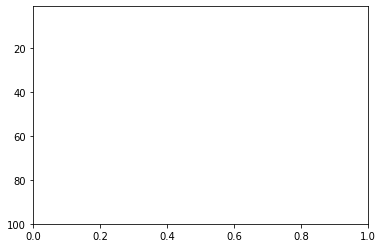

In [92]:
dfAdj = df.transpose().reset_index(drop=True)
dfAdj[dfAdj < 100] = np.nan
#dfAlt = dfAlt.dropna()

#dfAlt
for column in dfAdj.columns:
    dfAdj[column] = dfAdj[column].dropna().reset_index(drop=True)

dfAdj.plot(figsize=(10, 5), title="COVID-19 Cumulative Cases by Country")
plt.show()
plt.ylim(ymin=100)
dfAdj

## Normalising by population

To normalise the confirmed cases by population, we use population data from [datahub.io](https://datahub.io/JohnSnowLabs/population-figures-by-country) to compare countries by cases per million.  



In [93]:
population = 'data/populationCountry.csv'
popDS = pd.read_csv(population)
popDS = popDS.set_index('Country')


The two data sets are merged by country name, so the country names from the population data are cleaned to match those of the Covid-19 data. As there were only a handful of differences, this was done manually.

In [94]:
print(sorted(set(grouped.index).difference(set(popDS.index))))

replacements = { 'Brunei Darussalam': 'Brunei', 'Bahamas, The': 'Bahamas', 'Myanmar':'Burma', 
'Congo, Dem. Rep.': 'Congo (Kinshasa)', 'Congo, Rep.': 'Congo (Brazzaville)', 
'Czech Republic': 'Czechia', 'Egypt, Arab Rep.': 'Egypt', 
'Swaziland': 'Eswatini', 'Gambia, The': 'Gambia', 'Macedonia, FYR': 'North Macedonia',
'Iran, Islamic Rep.': 'Iran', 'Korea, Rep.': 'Korea, South',
'Kyrgyz Republic': 'Kyrgyzstan', 'Lao PDR': 'Laos', 'Russian Federation': 'Russia', 'United States': 'US', 
"St\.": 'Saint', 'Slovak Republic': 'Slovakia', 'Syrian Arab Republic': 'Syria', 
'Venezuela, RB': 'Venezuela', 'Yemen, Rep.': 'Yemen'
}

for source, target in replacements.items():
    popDS.index = popDS.index.str.replace(source, target)
    



['Bahamas', 'Brunei', 'Burma', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Czechia', 'Diamond Princess', 'Egypt', 'Eswatini', 'Gambia', 'Holy See', 'Iran', 'Korea, South', 'Kyrgyzstan', 'Laos', 'MS Zaandam', 'North Macedonia', 'Russia', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Slovakia', 'Syria', 'Taiwan*', 'US', 'Venezuela', 'Western Sahara', 'Yemen']


We convert the population data to 'per million' by dividing by 1e6. Then we join by country, which are the indexes of both datasets. 

In [95]:
#JOIN covid-19 and 2016 population data
popDS = popDS.loc[:, ['Year_2016']].div(10**6) #only join populations for 2016
df1 = pd.merge(grouped, popDS, left_index=True, right_index=True, how="left")

#drop null values for Population in 2016
df1 = df1[df1['Year_2016'].notnull()]
df1.tail()


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,Year_2016
Country/Region,,,,,,,,,,,,,,,,,,,,,
Vietnam,0,2,2,2,2,2,2,2,2,2,...,265,266,267,268,268,268,268,268,268,92.701100
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,308,308,374,374,402,418,437,449,466,4.551566
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,27.584213
Zambia,0,0,0,0,0,0,0,0,0,0,...,45,45,48,48,52,57,61,65,70,16.591390
Zimbabwe,0,0,0,0,0,0,0,0,0,0,...,17,17,23,23,24,25,25,25,28,16.150362


We do a sanity check for populations of US and Australia ~ 320 million and 24 million respectively, which seems about right. 

In [96]:
df1.loc[['Australia', 'US'], "Year_2016"]

Country/Region
Australia     24.127159
US           323.127513
Name: Year_2016, dtype: float64

We calculate cases per million by dividing by 2016 population, then drop the population column (which should all be 1)

In [97]:
df2 = df1.div(df1['Year_2016'], axis=0).drop(['Year_2016'], axis=1)
df2.tail()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Vietnam,0.0,0.021575,0.021575,0.021575,0.021575,0.021575,0.021575,0.021575,0.021575,0.021575,...,2.826288,2.858650,2.869437,2.880225,2.891012,2.891012,2.891012,2.891012,2.891012,2.891012
West Bank and Gaza,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.714335,67.669018,67.669018,82.169521,82.169521,88.321250,91.836524,96.010911,98.647367,102.382345
Yemen,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.036253,0.036253,0.036253,0.036253,0.036253,0.036253,0.036253,0.036253,0.036253,0.036253
Zambia,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.591706,2.712250,2.712250,2.893067,2.893067,3.134156,3.435517,3.676606,3.917695,4.219056
Zimbabwe,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.866854,1.052608,1.052608,1.424117,1.424117,1.486035,1.547953,1.547953,1.547953,1.733707


### Comparing countries per capita

Below is a graph comparing the worst affected countries in terms of confirmed cases per million. Noticable high rates are seen for San Marino (Italy), Andorra (France/Spain Region), Luxembourge and Spain. 

Amongst the least affected countries are many regions in Africa, south-east Asia, Nepal and Papua New Guinea. As many of these countries have under-developed health care systems, it is likely that Covid-19 cases are under reported and therefore not as reliable. 

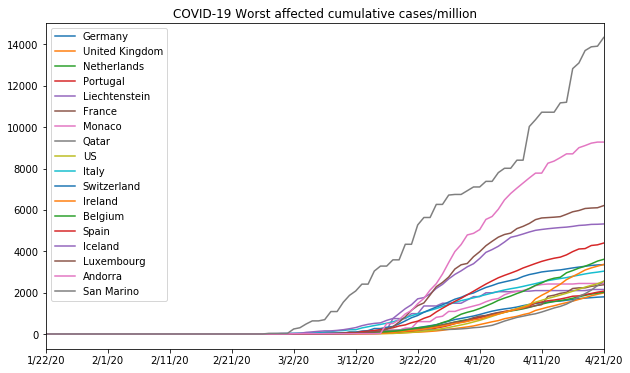

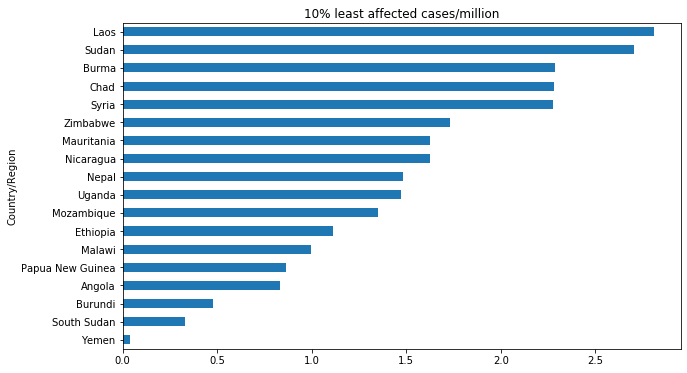

In [98]:
latest = df2.iloc[:,-1].sort_values()
percent = round(latest.size * 0.1)
worst_percent = latest[-percent:]
best_percent = latest[:percent]

extreme_countries = pd.concat([best_percent, worst_percent])

#best_ten_percent.plot.barh(title="10% least affected - cases per million")
df2.loc[worst_percent.index, :].transpose().plot(figsize=(10, 6), title="COVID-19 Worst affected cumulative cases/million").legend(loc="upper left")
plt.show()
#worst_ten_percent.plot.barh(title = "10% most affected - cases per million")
#df2.loc[best_percent.index, :].transpose().plot(figsize=(10, 6), title="COVID-19 Least affected cumulative cases/million").legend(loc="upper left")
df2.loc[best_percent.index].iloc[:, -1].transpose().plot.barh(title = "10% least affected cases/million", figsize=(10, 6))



## Linear Regression model

We are going to compare the United States and China by fitting a linear regression model to the log of confirmed cases of Covid-19. A good fit for this model would indicate exponential growth. 

### United States

US cases = days * [0.17011842] + -0.7225152833665041

MSE: 0.97
R Squared: 0.95


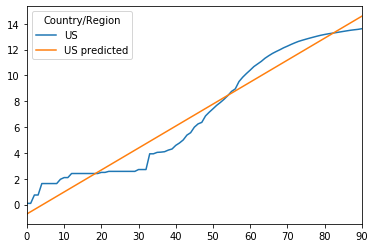

In [114]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error as MSE

log_set = np.log(df.transpose().reset_index(drop=True).add(0.1))
#add 0.1 to avoid log 0

#perform linear regression
reg = linear_model.LinearRegression()
X = log_set.index[:, np.newaxis]
y = log_set['US']
reg.fit(X, y)
predicted = reg.predict(X)

print("US cases = days *", reg.coef_, "+", reg.intercept_)
log_set['US predicted'] = reg.predict(X)
mse = ((np.array(y)-predicted)**2).sum()/len(y)
r2 = r2_score(y, predicted)
print(f"\nMSE: {mse:.2f}")
print(f"R Squared: {r2:.2f}")

log_set[['US', 'US predicted']].plot()


The R-squared of 0.95 shows that 95% of the variation of the log values are explained by the linear model. This indicates that the US has exponential growth for the first 90 days. 

###  China

It can be seen visually aswell as numerically, that the linear regression against the log values for China 
are not a good fit. R-squared is essentially zero, and the Mean Squared Error is around 30 times higher than 
the linear regression for the US. 

Chinese cases = days * [0.02995376] + 9.422356059837162

China MSE: 29.25
China R Squared:, -0.40


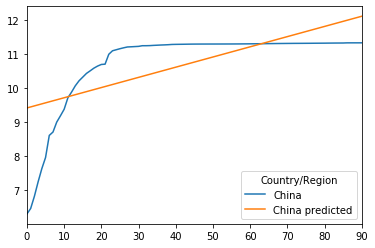

In [115]:
#fit linear regression for China

china = log_set['China']

reg = linear_model.LinearRegression()
reg.fit(X, china)

#predict
china_predicted = reg.predict(X)
print("Chinese cases = days *", reg.coef_, "+", reg.intercept_)
log_set['China predicted'] = reg.predict(X)

#evaluate
mse = ((np.array(y)-china_predicted)**2).sum()/len(y)
r2 = r2_score(y, china_predicted)
print(f"\nChina MSE: {mse:.2f}")
print(f"China R Squared:, {r2:.2f}")

#graph
log_set[['China', 'China predicted']].plot()

### What if? 
It appears that the cumulative number of infections appears to flatten around 20 days. If a linear regression is fitted against the first 20 days, we can make a predection against this model of the number of infections after 90 days if the number of infections had not levelled off. The projection shows more people infected than the population of plant earth. Such is the power of exponential growth! 

cases = days * [0.23898903] + 6.7186903674920195
MSE: 0.02
R Squared: 0.95
Predicted for China on day 91 of dataset: 1,816,083,021,046.0574


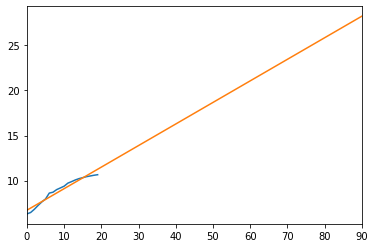

In [117]:
china_first_20_days = china[:20]

reg = linear_model.LinearRegression()
reg.fit(X[:20], china_first_20_days)
china_first_20_days.plot()

#predict
china_predicted = reg.predict(X)
pd.Series(china_predicted).plot()
print("cases = days *", reg.coef_, "+", reg.intercept_)
log_set['China predicted'] = reg.predict(X)

#evaluate
mse = ((np.array(china_first_20_days)-china_predicted[:20])**2).sum()/len(y)
r2 = r2_score(china_first_20_days, china_predicted[:20])
print(f"MSE: {mse:.2f}")
print(f"R Squared: {r2:.2f}")
print(f"Predicted for China on day {len(X)} of dataset: {math.exp(china_predicted[len(china_predicted)-1]):,}")



### Identify countries with exponential growth

Countries with exponential growth can be detected iteratively by using the above procedure below. We use a R-squared threshold
value above 0.7 to determine exponentiality. 

In [118]:
countries = ['Australia', 'China', 'US', 'United Kingdom', 'Italy']
exp_growth = []
for country in countries:
    china = log_set[country]
    #fit
    reg = linear_model.LinearRegression()
    reg.fit(X, china)

    #predict
    china_predicted = reg.predict(X)
    log_set['China predicted'] = reg.predict(X)

    #evaluate
    r2 = r2_score(y, china_predicted)
    if r2 >= 0.7:
        exp_growth.append(country)
        
print(f"Countries with exponential growth: {', '.join(exp_growth)}")

    

Countries with exponential growth: US, United Kingdom, Italy
